In [1]:
using BenchmarkTools
include("functions.jl")
import Markdown # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # same function as below

In [14]:
# L =  [1 0 0 1 1 1
#     0 1 0 1 0 1
#     0 0 1 0 1 1]

L = L_generator(20,40)
    #case1-------------
# #binding
# N = [2 0 -1 0
#     0 1 1 -1]
# # L = [
# # 	1 0 1
# # 	0 1 1
# # 	]
# x_sym = [:P, :P2, :DNA, :C]
# q_sym = [:tP, :tD]
# K_sym = [:K1, :K2]

#Catalysis
# S = [
#     0
#     ; -1;;
# ]#t_E #t_S
# aT = [0 0 1] # only involving total
# k = [0.1,] #catalysis rate

bnc_test = Bnc(L=L,)
    # L=L,
    # x_sym=x_sym, q_sym=q_sym, K_sym=K_sym,
    # S=S, aT=aT, k=k)

Bnc([0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … -1 0; 0 0 … 0 -1], [1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0], 20, 40, 20, Num[x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀  …  x₃₁, x₃₂, x₃₃, x₃₄, x₃₅, x₃₆, x₃₇, x₃₈, x₃₉, x₄₀], Num[q₁, q₂, q₃, q₄, q₅, q₆, q₇, q₈, q₉, q₁₀, q₁₁, q₁₂, q₁₃, q₁₄, q₁₅, q₁₆, q₁₇, q₁₈, q₁₉, q₂₀], Num[K₁, K₂, K₃, K₄, K₅, K₆, K₇, K₈, K₉, K₁₀, K₁₁, K₁₂, K₁₃, K₁₄, K₁₅, K₁₆, K₁₇, K₁₈, K₁₉, K₂₀], 1, nothing, nothing, nothing, nothing, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.6931471805599453, 0.6931471805599453, 0.0, 1.0986122886681098, 1.3862943611198906, 1.9459101490553132, 1.9459101490553132, 1.3862943611198906, 1.6094379124341003  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], true, [[1], [2, 25], [3, 32], [4], [5, 33, 39], [6, 21, 32, 39], [7, 21, 25, 29, 32, 38, 39], [8, 22, 23, 27, 29, 35, 40], [9, 21, 32, 39], [10, 30, 31, 35, 37], [11, 23, 27, 29, 34, 36, 40], [12, 22, 35], [13, 21, 26, 32,

In [27]:
simplify.(c.logder_x_qK *  log.([bnc_test.q_sym ./ c.a ; bnc_test.K_sym]))

6-element Vector{Num}:
  log(q₃) - log(q₂)
                  0
 -log(q₃) + log(q₂)
  log(q₃) - log(q₂)
                  0
                  0

In [28]:
#|>svd |> (x->x.U)
rnd(x) = x .|> (x-> abs(x) > 1e-10 ? x : 0) |> (x-> round.(x,digits=2))

rnd (generic function with 1 method)

In [29]:
c = create_regime(bnc_test; regime=[5,6,6])

Regime([5, 6, 6], [0 0 … 1 0; 0 0 … 0 1; … ; 1 0 … -1 0; 1 1 … 0 -1], [0 -1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], 1, -1, [1, 1, 1])

In [34]:
x_ineq_mtx(bnc_test, regime=c.regime) * log.(bnc_test.x_sym) .<0 .|> simplify

7-element Vector{Num}:
 (-log(x₆) + log(x₅)) < 0
  (log(x₁) - log(x₅)) < 0
 (-log(x₆) + log(x₂)) < 0
  (log(x₆) - log(x₅)) < 0
 (-log(x₆) + log(x₃)) < 0
  (log(x₄) - log(x₅)) < 0
 (-log(x₆) + log(x₄)) < 0

In [4]:
a = ∂logqK_∂logx_regime(bnc_test;regime=[1,2,3])

6×6 Matrix{Int64}:
 1  0  0   0   0   0
 0  1  0   0   0   0
 0  0  1   0   0   0
 1  1  0  -1   0   0
 1  0  1   0  -1   0
 1  1  1   0   0  -1

In [35]:
∂logx_∂logqK_regime(bnc_test;regime=[5,6,6])[1]

6×6 Matrix{Int64}:
 0  -1   1  0  0  0
 0   0   0  0  0  0
 0   1  -1  0  0  0
 0  -1   1  0  0  0
 0   0   0  0  0  0
 0   0   0  0  0  0

In [6]:
using SparseArrays

In [32]:
@btime a = sparse(Matrix{Float64}([bnc_test.L;bnc_test.N]))

  1.657 μs (13 allocations: 28.86 KiB)


40×40 SparseMatrixCSC{Float64, Int64} with 186 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠠⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⢆⡀⠄⡀⡄⠰⠁⡀⠠⢇⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⢁⠄⠀⠄⠔⠊⠠⡢⠂⠡⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⡅⠐⠈⠀⠐⢪⠠⠢⠃⡅⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠃⠠⠈⢔⠤⠜⠂⠄⠥⠫⎥
⎢⠀⠀⠈⠱⠁⠔⢁⠉⠉⡀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠈⠀⠀⠡⠀⠄⠂⠀⢂⢄⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⡀⢀⡉⡰⠁⡰⣀⣀⠇⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠁⠠⠠⡢⠠⡂⠈⠄⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠤⢆⠌⡀⠍⠤⡥⡃⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [33]:
@btime a_int = Matrix{Float64}([bnc_test.L;bnc_test.N])

  890.200 ns (6 allocations: 25.17 KiB)


40×40 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0   0.0   0.0   0.0   1.0   0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  …   0.0   0.0   0.0   0.0   1.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0   0.0   0.0   1.0   1.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.0   0.0   0.0   0.0   0.0   1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   1.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.0   0.0   1.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0   2.0   0.0   0.0   0.0   1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   1.0   0.0   1.0   0.0
 ⋮             

In [34]:
L = sparse(Matrix{Float64}(bnc_test.L))

20×40 SparseMatrixCSC{Float64, Int64} with 93 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠠⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⢆⡀⠄⡀⡄⠰⠁⡀⠠⢇⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⢁⠄⠀⠄⠔⠊⠠⡢⠂⠡⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⡅⠐⠈⠀⠐⢪⠠⠢⠃⡅⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠃⠠⠈⢔⠤⠜⠂⠄⠥⠫⎦

In [35]:
x = randomize(40)

40-element Vector{Float64}:
 7442.4426886648835
   67.03793980440112
   90.87740524082115
    5.683931307350826
    0.006060655229393084
    0.007247712980340663
    1.4701953681949629
    0.0010016106736467133
 2975.763615089099
 1160.1727665959106
    0.001626110066136457
    0.002185927848750367
    0.0002365885427380147
    ⋮
    5.3338565929370894e-5
   82.73071624434495
    0.3278648803752559
    9.895860718442302
    1.3180990879475628e-5
    0.4440609178418647
    0.0009326642198842696
    4.674336841542993
    0.00039730363752523134
    0.1151060844794079
    0.29256084841919033
 3330.163957351821

In [36]:
@btime bnc_test.L * x

  182.244 ns (2 allocations: 224 bytes)


20-element Vector{Float64}:
  7442.4426886648835
    67.03803100928323
   100.77326595926345
     5.683931307350826
     0.2986346846394629
    10.268204175973311
    11.846402459115385
  3330.1765384503406
  2986.024571552092
  1243.2326776884881
  3339.9681785906378
     0.0039048878718280595
    12.963334229988938
    83.40104071539345
    15.379579920091603
    56.12048623112518
  3510.5441711044505
    10.275016639661308
 15737.430993721322
     4.730151126094316

In [37]:
@btime L * x

  57.293 ns (2 allocations: 224 bytes)


20-element Vector{Float64}:
  7442.4426886648835
    67.03803100928323
   100.77326595926345
     5.683931307350826
     0.2986346846394629
    10.268204175973311
    11.846402459115385
  3330.1765384503406
  2986.024571552092
  1243.2326776884881
  3339.9681785906378
     0.0039048878718280595
    12.963334229988938
    83.40104071539345
    15.379579920091603
    56.12048623112518
  3510.5441711044505
    10.275016639661308
 15737.430993721322
     4.730151126094316

In [ ]:
(L * x) .* L ./ x'

20×40 SparseMatrixCSC{Float64, Int64} with 800 stored entries:
⎡⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎤
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎣⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎦

In [22]:
@btime  a[1:3,:] .=  x .* L ./ (L * x)' 

LoadError: DimensionMismatch: arrays could not be broadcast to a common size: a has axes Base.OneTo(40) and b has axes Base.OneTo(20)

In [58]:
a_lu = lu(a)

SparseArrays.UMFPACK.UmfpackLU{Float64, Int64}
L factor:
6×6 SparseMatrixCSC{Float64, Int64} with 15 stored entries:
  1.0    ⋅       ⋅         ⋅          ⋅    ⋅ 
 -1.0   1.0      ⋅         ⋅          ⋅    ⋅ 
   ⋅    0.375   1.0        ⋅          ⋅    ⋅ 
 -0.75  0.375  -0.333333  1.0         ⋅    ⋅ 
   ⋅     ⋅       ⋅        0.8        1.0   ⋅ 
   ⋅     ⋅     -0.888889  0.266667  -0.5  1.0
U factor:
6×6 SparseMatrixCSC{Float64, Int64} with 15 stored entries:
 -0.333333  0.333333    ⋅        0.333333    ⋅         ⋅ 
   ⋅        0.666667   0.333333  0.333333    ⋅         ⋅ 
   ⋅         ⋅        -0.375     0.125       ⋅        0.25
   ⋅         ⋅          ⋅        0.416667   0.25      0.0833333
   ⋅         ⋅          ⋅         ⋅        -0.533333  0.266667
   ⋅         ⋅          ⋅         ⋅          ⋅        0.666667

In [63]:
k = sparse(Matrix{Float64}([bnc_test.L;bnc_test.N]))

6×6 SparseMatrixCSC{Float64, Int64} with 20 stored entries:
 1.0   ⋅    ⋅    1.0   1.0   1.0
  ⋅   1.0   ⋅    1.0    ⋅    1.0
  ⋅    ⋅   1.0    ⋅    1.0   1.0
 1.0  1.0   ⋅   -1.0    ⋅     ⋅ 
 1.0   ⋅   1.0    ⋅   -1.0    ⋅ 
 1.0  1.0  1.0    ⋅     ⋅   -1.0

In [ ]:
@btime lu!(a_lu,sparse(Matrix{Float64}([bnc_test.L;bnc_test.N])))

In [ ]:
@btime lu(Matrix{Float64}([bnc_test.L;bnc_test.N]))

SparseArrays.UMFPACK.UmfpackLU{Float64, Int64}
L factor:
6×6 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0
U factor:
6×6 SparseMatrixCSC{Float64, Int64} with 13 stored entries:
 -0.333333    ⋅          ⋅    0.333333  0.333333   ⋅ 
   ⋅        -0.333333    ⋅    0.333333   ⋅        0.333333
   ⋅          ⋅        -0.25  0.25      0.25      0.25
   ⋅          ⋅          ⋅    1.0        ⋅         ⋅ 
   ⋅          ⋅          ⋅     ⋅        1.0        ⋅ 
   ⋅          ⋅          ⋅     ⋅         ⋅        1.0

In [167]:
[bnc_test.L;bnc_test.N] |> rnd

6×6 Matrix{Float64}:
 -0.27   0.65   0.0    0.0    0.65   0.27
 -0.19   0.46  -0.57   0.42  -0.46  -0.19
 -0.19   0.46   0.57  -0.42  -0.46  -0.19
 -0.46  -0.19  -0.42  -0.57   0.19  -0.46
 -0.46  -0.19   0.42   0.57   0.19  -0.46
 -0.65  -0.27   0.0    0.0   -0.27   0.65

In [85]:
K = svd(a;full=true)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
6×6 Matrix{Float64}:
  0.170331  -0.478631   2.92199e-16  -0.274287   0.812278     -0.0828899
  0.170331  -0.478631   1.00681e-16  -0.274287  -0.334354      0.744899
  0.170331  -0.478631   1.17463e-16  -0.274287  -0.477924     -0.662009
 -0.446875  -0.383407  -0.707107      0.391538   1.11022e-16  -9.02056e-17
 -0.446875  -0.383407   0.707107      0.391538   5.55112e-17  -4.85723e-17
 -0.716637   0.13688    3.9527e-16   -0.683883   5.55112e-17   1.17961e-16
singular values:
6-element Vector{Float64}:
 2.6846468811587325
 1.8127277238875654
 1.4142135623730951
 0.7118211309971746
 3.267213499537025e-16
 3.735409737406056e-17
Vt factor:
6×6 Matrix{Float64}:
 -0.59985      -0.433395  -0.433395   0.166456   0.166456   0.457278
 -0.347506     -0.135998  -0.135998   0.211508   0.211508  -0.867627
 -1.04781e-15  -0.5        0.5        0.5       -0.5        5.55112e-17
  0.139353     -0.410699  -0.410699  -0.550052  -0.550052  

In [91]:
vcat(1:1,2:3)

3-element Vector{Int64}:
 1
 2
 3

In [94]:
a[[1,2,4],1:3]

3×3 Matrix{Int64}:
 0  0  0
 0  0  0
 1  1  0

In [78]:
eps(eltype(K.S))

2.220446049250313e-16

In [86]:
findall(K.S .< 1e-10)

2-element Vector{Int64}:
 5
 6

In [302]:
∂logx_∂logqK_regime(bnc_test;regime=[4,4])[1]

4×4 Matrix{Float64}:
 0.111111  0.111111   0.444444      0.222222
 0.277778  0.277778   0.111111      0.555556
 0.222222  0.222222  -0.111111      0.444444
 0.5       0.5        2.66504e-17  -3.71412e-18

In [32]:
a = ∂logqK_∂logx_regime(bnc_test;regime=[5,6,6])

6×6 Matrix{Int64}:
 0  0  0   0   1   0
 0  0  0   0   0   1
 0  0  0   0   0   1
 1  1  0  -1   0   0
 1  0  1   0  -1   0
 1  1  1   0   0  -1

In [34]:
@btime svd(a)

  2.939 μs (14 allocations: 4.99 KiB)


SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
6×6 Matrix{Float64}:
  0.0795046   0.355594    0.309805   -0.645141   0.595858  -3.18491e-16
  0.139891   -0.457998    0.29357    -0.338464  -0.264437   0.707107
  0.139891   -0.457998    0.29357    -0.338464  -0.264437  -0.707107
 -0.467053   -0.0674382   0.75542     0.422648   0.167403   7.34901e-18
 -0.482729   -0.59519    -0.393354   -0.120768   0.493366  -2.04287e-16
 -0.709489    0.308594   -0.0791709  -0.401823  -0.48339    1.2531e-16
singular values:
6-element Vector{Float64}:
 2.659269543970362
 1.635172907254161
 1.5065467341157324
 0.9015565751949363
 0.41473815298526323
 1.2406342613509867e-16
Vt factor:
6×6 Matrix{Float64}:
 -0.623957  -0.44243      -0.448325   0.175632    0.211424    0.372009
 -0.216511   0.147481     -0.175269   0.0412422   0.581458   -0.748905
  0.187777   0.448873     -0.313648  -0.501425    0.466735    0.442277
 -0.110856   0.0230988    -0.579654  -0.468798   -0.581631   -0.305144
  0.4

In [179]:
adj_singular(a)[1] |> rnd

line = [1.8388068845354163e-16 -3.535957026426815e-32 -1.8388068845354158e-16 1.8388068845354153e-16 7.955903309460334e-32 -1.7679785132134075e-32; -0.4082482904638632 7.850462293418876e-17 0.408248290463863 -0.40824829046386296 -1.7663540160192472e-16 3.925231146709438e-17; 0.40824829046386313 -7.850462293418875e-17 -0.40824829046386296 0.40824829046386285 1.766354016019247e-16 -3.925231146709437e-17; -4.242950058723806e-18 8.159034643114828e-34 4.2429500587238044e-18 -4.242950058723804e-18 -1.8357827947008363e-33 4.079517321557414e-34; 1.1794530397189852e-16 -2.2680441857212795e-32 -1.1794530397189847e-16 1.1794530397189847e-16 5.103099417872879e-32 -1.1340220928606397e-32; -7.234787853480838e-17 1.3912227086144687e-32 7.234787853480835e-17 -7.234787853480834e-17 -3.1302510943825547e-32 6.956113543072343e-33]


6×6 Matrix{Float64}:
  0.0  0.0   0.0   0.0  0.0  0.0
 -1.0  0.0   1.0  -1.0  0.0  0.0
  1.0  0.0  -1.0   1.0  0.0  0.0
  0.0  0.0   0.0   0.0  0.0  0.0
  0.0  0.0   0.0   0.0  0.0  0.0
  0.0  0.0   0.0   0.0  0.0  0.0

In [44]:
@btime adj_singular_matrix(a)[1]

  3.386 μs (35 allocations: 6.84 KiB)


6×6 Matrix{Int64}:
 0  -1   1  0  0  0
 0   0   0  0  0  0
 0   1  -1  0  0  0
 0  -1   1  0  0  0
 0   0   0  0  0  0
 0   0   0  0  0  0

In [45]:
@btime adjoint_matrix(a)

  7.878 μs (444 allocations: 27.44 KiB)


6×6 Matrix{Int64}:
 0  -1   1  0  0  0
 0   0   0  0  0  0
 0   1  -1  0  0  0
 0  -1   1  0  0  0
 0   0   0  0  0  0
 0   0   0  0  0  0

In [187]:
@btime adj_singular(a)[1]

  3.511 μs (35 allocations: 6.84 KiB)


6×6 Matrix{Float64}:
  0.0  -1.0   1.0  -0.0   0.0  -0.0
 -0.0   0.0  -0.0   0.0  -0.0   0.0
 -0.0   1.0  -1.0   0.0  -0.0   0.0
  0.0  -1.0   1.0  -0.0   0.0  -0.0
  0.0  -0.0   0.0  -0.0   0.0  -0.0
 -0.0   0.0  -0.0   0.0  -0.0   0.0

In [ ]:
function adj(M)
    row, col = size(M)
    a = zeros(eltype(M),row, col)
    for i in 1:row
        for j in 1:col
            a[j,i] = (-1)^(i+j) * det( @view M[setdiff(1:row, i), setdiff(1:col, j)])
        end
    end
    return a
end

function adj_singular_matrix(M::Matrix{<:Real})::Tuple{Matrix{<:Real},Int}
    n, m = size(M)
    @assert n == m "Matrix must be square"
    M_svd = svd(M;full=true)
    singular_pos = findall(M_svd.S .< 1e-7)
    singularity = length(singular_pos)
    adj = zeros(eltype(M), n, n)
    if length(singular_pos) > 1
        @warn("Multiple singular values found")
        return zeros(n, n), singularity
    else # sigularity of 1
        line = M_svd.Vt[singular_pos[1],:] * M_svd.U[:, singular_pos[1]]'
        # @show line
        for i in 1:n
            if abs(line[i,i]) >1e-7
                idx = vcat(1:i-1,i+1:n)
                # @show idx
                amp = det(M[idx,idx])/ line[i,i]
                # @show amp
                @. adj = round(line * amp)
                return adj, singularity
            end
        end
        @error("No non-zero diagonal element found in the singular vector")
    end
end

adj_singular_matrix (generic function with 1 method)

In [153]:
m = svd(a)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
6×6 Matrix{Float64}:
  0.0795046   0.355594    0.309805   -0.645141   0.595858  -3.18491e-16
  0.139891   -0.457998    0.29357    -0.338464  -0.264437   0.707107
  0.139891   -0.457998    0.29357    -0.338464  -0.264437  -0.707107
 -0.467053   -0.0674382   0.75542     0.422648   0.167403   7.34901e-18
 -0.482729   -0.59519    -0.393354   -0.120768   0.493366  -2.04287e-16
 -0.709489    0.308594   -0.0791709  -0.401823  -0.48339    1.2531e-16
singular values:
6-element Vector{Float64}:
 2.659269543970362
 1.635172907254161
 1.5065467341157324
 0.9015565751949363
 0.41473815298526323
 1.2406342613509867e-16
Vt factor:
6×6 Matrix{Float64}:
 -0.623957  -0.44243      -0.448325   0.175632    0.211424    0.372009
 -0.216511   0.147481     -0.175269   0.0412422   0.581458   -0.748905
  0.187777   0.448873     -0.313648  -0.501425    0.466735    0.442277
 -0.110856   0.0230988    -0.579654  -0.468798   -0.581631   -0.305144
  0.4

LoadError: MethodError: no method matching lu(::SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}})
The function `lu` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  lu([91m::SparseArrays.AbstractSparseMatrixCSC{<:Union{Float16, Float32}, Ti}[39m; check) where Ti<:Union{Int32, Int64}
[0m[90m   @[39m [35mSparseArrays[39m [90m~/.julia/juliaup/julia-1.11.5+0.x64.linux.gnu/share/julia/stdlib/v1.11/SparseArrays/src/solvers/[39m[90m[4mumfpack.jl:392[24m[39m
[0m  lu([91m::SparseArrays.AbstractSparseMatrixCSC{Tv, Ti}[39m; check, q, control) where {Tv<:Union{Float64, ComplexF64}, Ti<:Union{Int32, Int64}}
[0m[90m   @[39m [35mSparseArrays[39m [90m~/.julia/juliaup/julia-1.11.5+0.x64.linux.gnu/share/julia/stdlib/v1.11/SparseArrays/src/solvers/[39m[90m[4mumfpack.jl:384[24m[39m
[0m  lu([91m::SparseArrays.AbstractSparseMatrixCSC{<:Union{ComplexF32, ComplexF16}, Ti}[39m; check) where Ti<:Union{Int32, Int64}
[0m[90m   @[39m [35mSparseArrays[39m [90m~/.julia/juliaup/julia-1.11.5+0.x64.linux.gnu/share/julia/stdlib/v1.11/SparseArrays/src/solvers/[39m[90m[4mumfpack.jl:395[24m[39m
[0m  ...


In [152]:
pythonprint(a)

[[0,0,0,0,1,0],[0,0,0,0,0,1],[0,0,0,0,0,1],[1,1,0,-1,0,0],[1,0,1,0,-1,0],[1,1,1,0,0,-1]]


In [ ]:
adjoint_matrix(a) |

6×6 Matrix{Float64}:
 -0.0802423  -0.143128  -0.143128   0.468078    0.488073   0.718771
 -0.356777    0.459871   0.459871   0.0690436   0.59825   -0.308998
 -0.30613    -0.297422  -0.297422  -0.763142    0.403165   0.0808298
  0.647749    0.345105   0.345105  -0.42315     0.119772   0.408224
 -0.600496    0.270693   0.270693  -0.167959   -0.502575   0.490044
 -0.0        -0.712038   0.712038   0.0        -0.0       -1.9157e-17

In [151]:
adj_singular(a)[1]

line = [1.8388068845354163e-16 -3.535957026426815e-32 -1.8388068845354158e-16 1.8388068845354153e-16 7.955903309460334e-32 -1.7679785132134075e-32; -0.4082482904638632 7.850462293418876e-17 0.408248290463863 -0.40824829046386296 -1.7663540160192472e-16 3.925231146709438e-17; 0.40824829046386313 -7.850462293418875e-17 -0.40824829046386296 0.40824829046386285 1.766354016019247e-16 -3.925231146709437e-17; -4.242950058723806e-18 8.159034643114828e-34 4.2429500587238044e-18 -4.242950058723804e-18 -1.8357827947008363e-33 4.079517321557414e-34; 1.1794530397189852e-16 -2.2680441857212795e-32 -1.1794530397189847e-16 1.1794530397189847e-16 5.103099417872879e-32 -1.1340220928606397e-32; -7.234787853480838e-17 1.3912227086144687e-32 7.234787853480835e-17 -7.234787853480834e-17 -3.1302510943825547e-32 6.956113543072343e-33]


6×6 Matrix{Float64}:
  4.50414e-16  -8.66129e-32  -4.50414e-16  …   1.94879e-31  -4.33065e-32
 -1.0           1.92296e-16   1.0             -4.32667e-16   9.61481e-17
  1.0          -1.92296e-16  -1.0              4.32667e-16  -9.61481e-17
 -1.03931e-17   1.99855e-33   1.03931e-17     -4.49673e-33   9.99274e-34
  2.88906e-16  -5.55555e-32  -2.88906e-16      1.25e-31     -2.77778e-32
 -1.77215e-16   3.40779e-32   1.77215e-16  …  -7.66752e-32   1.70389e-32

In [52]:
nullspace(M) * nullspace(M')'

4×4 Matrix{Float64}:
 -0.0179859    -0.568147      0.586133      3.86266e-17
  0.586133     -0.0179859    -0.568147      1.22281e-18
 -0.568147      0.586133     -0.0179859    -3.98494e-17
  2.87347e-17  -1.35974e-16   1.07239e-16   9.24446e-33

In [137]:
w_s = sparse(w)

4×4 SparseMatrixCSC{Int64, Int64} with 7 stored entries:
 1  ⋅   ⋅   ⋅
 ⋅  1   ⋅   ⋅
 2  ⋅  -1   ⋅
 ⋅  1   1  -1

In [140]:
@btime w\x

  34.146 ns (2 allocations: 96 bytes)


4-element Vector{Float64}:
  0.0023869649702183307
  0.00043466855658053045
  0.0046030666930478034
 -0.7784859362795923

In [141]:
@btime w_s\x

  35.674 ns (2 allocations: 96 bytes)


4-element Vector{Float64}:
  0.0023869649702183307
  0.00043466855658053045
  0.0046030666930478034
 -0.7784859362795923

In [166]:
N = N_generator(2000,4000)

2000×4000 Matrix{Int64}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …   0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …   0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …   0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

In [167]:
bnc2 = Bnc(N=N)

Bnc([0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … -1 0; 0 0 … 0 -1], [1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], 2000, 4000, 2000, Num[x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀  …  x₃₉₉₁, x₃₉₉₂, x₃₉₉₃, x₃₉₉₄, x₃₉₉₅, x₃₉₉₆, x₃₉₉₇, x₃₉₉₈, x₃₉₉₉, x₄₀₀₀], Num[q₁, q₂, q₃, q₄, q₅, q₆, q₇, q₈, q₉, q₁₀  …  q₁₉₉₁, q₁₉₉₂, q₁₉₉₃, q₁₉₉₄, q₁₉₉₅, q₁₉₉₆, q₁₉₉₇, q₁₉₉₈, q₁₉₉₉, q₂₀₀₀], Num[K₁, K₂, K₃, K₄, K₅, K₆, K₇, K₈, K₉, K₁₀  …  K₁₉₉₁, K₁₉₉₂, K₁₉₉₃, K₁₉₉₄, K₁₉₉₅, K₁₉₉₆, K₁₉₉₇, K₁₉₉₈, K₁₉₉₉, K₂₀₀₀], nothing, nothing, nothing, nothing, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6931471805599453, 1.3862943611198906, 2.3978952727983707, 1.0986122886681098, 1.0986122886681098, 2.3978952727983707, 0.6931471805599453, 0.6931471805599453, 1.3862943611198906, 0.6931471805599453  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], true, [[1, 3035], [2, 2701, 2801, 3259], [3, 2001, 2006, 2029, 2050, 2058, 2602, 2636, 3762, 3937, 3979], [4, 2014, 2979], 

In [168]:
z = [bnc2.L;bnc2.N]

4000×4000 Matrix{Int64}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …   0   0   0   0   0   0   0   0   0
 0  1  0  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  1  0  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  1  0  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  1  0  0  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …   0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  1  0  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  1  0  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  1  0  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  1  0  0  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  1  0  0  …   0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  1  0      0   0   0   0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0  1 

In [169]:
x = randomize(4000)

4000-element Vector{Float64}:
 19962.110816221648
     1.449238350789772e-5
     0.23860056239742605
     0.004990730382008262
     1.241815796133271
  2936.6084647345956
 14635.213314189568
     0.11239362882129361
     0.005574143033305821
     0.026917517920927427
     0.05011675736947005
   160.61060475662205
     0.01736310233375363
     ⋮
     2.1080441613892524e-5
     0.0005449078547510316
    44.134149124927355
     0.0002023306009110884
 64571.41932718973
   647.6270453875954
    23.531140106487317
     7.643009165061639e-5
     2.0838319103211085e-5
     9.882281206843748
     0.00016917453603739087
     0.0024932347884147553

In [170]:
@btime z\x

  174.654 ms (9 allocations: 122.14 MiB)


4000-element Vector{Float64}:
   1996.0253241944774
   1580.4298485636255
  -5185.3578063578
  -1442.2671390803084
   3784.7886812801376
   1685.5758928943706
  10077.890389725842
  -2262.5296585192164
   7408.9162122283105
    880.0190131846731
   5357.6769613655815
   3091.27279368167
      0.01736310233375363
      ⋮
  -1810.4585913430728
  -6345.197134085981
    -23.016551731608626
   3254.1585645956566
 -24707.784583464647
  -2522.826341378497
  -4138.793969595622
  -3825.809586445443
  -6409.45507727413
    469.54680797224387
   8411.727651878557
   4208.510322949978

In [177]:
fieldnames(typeof(z_s))

(:m, :n, :colptr, :rowval, :nzval)

In [178]:
fieldnames(Matrix)

(:ref, :size)

In [171]:
z_s = sparse(z)

4000×4000 SparseMatrixCSC{Int64, Int64} with 15600 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣶⣾⣿⣽⣾⣿⣿⢿⣿⣿⣿⣿⣽⣿⣾⣿⣿⣿⣿⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣟⢿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣻⣿⣿⣿⣷⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣯⣯⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣟⣿⢿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⣿⣟⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⣿⣿⢿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⣿⢽⣿⠽⣿⣿⡿⣻⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⣿⣽⣯⣥⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⎥
⎢⢫⣿⣿⣿⣿⢿⣿⣿⡿⣯⡻⢿⣿⣟⣿⣿⣟⣟⣟⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣺⣿⣾⣿⣿⢷⣟⣿⣯⣿⣟⣿⣽⣿⣻⣿⣟⡟⠏⣽⣿⡻⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣳⢟⣹⣿⣾⣿⣿⣿⠽⣿⣿⣿⣽⢿⣿⣿⣯⣯⣿⣯⣿⡟⣞⣯⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢻⣻⣿⢫⠟⢿⣧⣿⣿⣿⣏⣿⣿⢯⣹⣝⡿⣫⣾⡾⣟⢷⣷⣷⣻⡇⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⠷⠿⣿⣿⣿⣿⣿⣏⣻⣟⣯⣽⢿⢿⣾⢻⣶⣾⢿⣯⣿⣺⣛⣿⣿⣲⣿⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢵⢯⣿⣏⣜⡻⣿⣿⢷⣿⠿⠫⣞⣾⣎⣻⣽⣾⣿⣾⣷⡻⠾⢳⠯⣹⢏⣟⣿⡾⣵⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢛⣗⣻⣿⣽⠛⣿⣯⡭⠷⣷⣼⣫⣭⢾⡟⣧⣷⣯⣭⢾⣷⣟⢿⢟⢖⢽⣿⣡⣻⡿⣿⣗⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠹⣿⣽⣿⣯⡷⢗⣏⣫⡝⣾⢎⢿⣾⣾⢷⡿⣭⠯⣻⣝⣿⣎⣿⣽⣽⡿⢽⣟⣿⣿⣾⢯⣿⡗⢄⠀⠀⠀⠀⎥
⎢⣮⣱⠟⣴⠛⣿⠻⢽⣽⣙⢛⣾⣸⣯⣿⣋⢛⢗⢽⣵⢙⢿⠶⢍⡿⢿⡿⣶⡭⣳⣥⡽⣝⣇⢼⡟⡷⢄⠀⠀⎥
⎣⠏⣻⡔⠾⡿⣟⣗⣕⠯⣝⢽⠑⡗⠿⡳⢭⠿⡶⠟⠯⡽⠵⣦⢖⠯⡺⢻⣟⣮⣿⡿⣷⡾⠼⣭⣯⠻⠗⢳⣄⎦

In [191]:
?\

search: \



  \(x, y)

  Left division operator: multiplication of y by the inverse of x on the left.
  Gives floating-point results for integer arguments.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> 3 \ 6
  2.0
  
  julia> inv(3) * 6
  2.0
  
  julia> A = [4 3; 2 1]; x = [5, 6];
  
  julia> A \ x
  2-element Vector{Float64}:
    6.5
   -7.0
  
  julia> inv(A) * x
  2-element Vector{Float64}:
    6.5
   -7.0

  ────────────────────────────────────────────────────────────────────────────

  \(A, B)

  Matrix division using a polyalgorithm. For input matrices A and B, the
  result X is such that A*X == B when A is square. The solver that is used
  depends upon the structure of A. If A is upper or lower triangular (or
  diagonal), no factorization of A is required and the system is solved with
  either forward or backward substitution. For non-triangular square matrices,
  an LU factorization is used.

  For rectangular A the result is the minimum-norm least squares solution
  computed by a pivoted QR factorization of A and a rank estimate of A based
  on the R factor.

  When A is sparse, a similar polyalgorithm is used. For indefinite matrices,
  the LDLt factorization does not use pivoting during the numerical
  factorization and therefore the procedure can fail even for invertible
  matrices.

  See also: factorize, pinv.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = [1 0; 1 -2]; B = [32; -4];
  
  julia> X = A \ B
  2-element Vector{Float64}:
   32.0
   18.0
  
  julia> A * X == B
  true

  ────────────────────────────────────────────────────────────────────────────

  (\)(F::QRSparse, B::StridedVecOrMat)

  Solve the least squares problem \min\|Ax - b\|^2 or the linear system of
  equations Ax=b when F is the sparse QR factorization of A. A basic solution
  is returned when the problem is underdetermined.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
  4×2 SparseMatrixCSC{Float64, Int64} with 3 stored entries:
   1.0   ⋅
   1.0   ⋅
    ⋅    ⋅
   1.0   ⋅
  
  julia> qr(A)\fill(1.0, 4)
  2-element Vector{Float64}:
   1.0
   0.0

In [250]:
# @variables z,p
L = [1 0 0 ;1 0 0 ;1 1 1]

3×3 Matrix{Int64}:
 1  0  0
 1  0  0
 1  1  1

In [251]:
x = [1,1,1]

3-element Vector{Int64}:
 1
 1
 1

In [249]:
@btime qr(L)\x

  1.245 μs (10 allocations: 576 bytes)


3-element Vector{Float64}:
  1.0
  0.0
 -0.0

In [244]:
@btime lu(L)\x

  5.055 ms (10 allocations: 7.64 MiB)


1000-element Vector{Float64}:
 -0.4620296008253278
  0.7419780601091361
 -1.337588388798303
  0.7617073363753099
 -0.25682236063567565
  1.035691654488812
 -0.671851305333203
 -1.7207187931705603
 -0.8098663926597578
 -0.6198414507745835
  1.0583997633897282
 -0.26397991719993735
  1.614505476122259
  ⋮
 -1.3324921373340386
 -0.7923170247814982
  0.965611601093342
  0.9169479107118667
 -0.3679008922846159
 -1.4007526687118987
  1.5946791076022566
  1.1534650690962633
  0.908777172246973
 -2.300142881156375
 -2.890896199713208
  1.141150371891457

In [239]:
ldiv!(y,qr(L),x)

3-element Vector{Float64}:
  1.0
  0.0
 -0.0

In [255]:
@btime pinv(L)

  1.049 μs (25 allocations: 2.98 KiB)


3×3 Matrix{Float64}:
  0.5    0.5   -5.55112e-17
 -0.25  -0.25   0.5
 -0.25  -0.25   0.5

In [256]:
@btime inv(qr(L))

  1.971 μs (10 allocations: 688 bytes)


3×3 Matrix{Float64}:
  0.57735      0.433013    -0.0
 -3.18453e15   3.18453e15   0.0
  3.18453e15  -3.18453e15   1.0

In [234]:
?ldiv!

search: ldiv! rdiv! div ldlt! has_ldiv! gkldiv



  ldiv!(Y, A, B) -> Y

  Compute A \ B in-place and store the result in Y, returning the result.

  The argument A should not be a matrix. Rather, instead of matrices it should
  be a factorization object (e.g. produced by factorize or cholesky). The
  reason for this is that factorization itself is both expensive and typically
  allocates memory (although it can also be done in-place via, e.g., lu!), and
  performance-critical situations requiring ldiv! usually also require
  fine-grained control over the factorization of A.

  │ Note
  │
  │  Certain structured matrix types, such as Diagonal and
  │  UpperTriangular, are permitted, as these are already in a
  │  factorized form

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = [1 2.2 4; 3.1 0.2 3; 4 1 2];
  
  julia> X = [1; 2.5; 3];
  
  julia> Y = zero(X);
  
  julia> ldiv!(Y, qr(A), X);
  
  julia> Y ≈ A\X
  true

  ────────────────────────────────────────────────────────────────────────────

  ldiv!(A, B)

  Compute A \ B in-place and overwriting B to store the result.

  The argument A should not be a matrix. Rather, instead of matrices it should
  be a factorization object (e.g. produced by factorize or cholesky). The
  reason for this is that factorization itself is both expensive and typically
  allocates memory (although it can also be done in-place via, e.g., lu!), and
  performance-critical situations requiring ldiv! usually also require
  fine-grained control over the factorization of A.

  │ Note
  │
  │  Certain structured matrix types, such as Diagonal and
  │  UpperTriangular, are permitted, as these are already in a
  │  factorized form

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = [1 2.2 4; 3.1 0.2 3; 4 1 2];
  
  julia> X = [1; 2.5; 3];
  
  julia> Y = copy(X);
  
  julia> ldiv!(qr(A), X);
  
  julia> X ≈ A\Y
  true

  ────────────────────────────────────────────────────────────────────────────

  ldiv!(a::Number, B::AbstractArray)

  Divide each entry in an array B by a scalar a overwriting B in-place. Use
  rdiv! to divide scalar from right.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> B = [1.0 2.0; 3.0 4.0]
  2×2 Matrix{Float64}:
   1.0  2.0
   3.0  4.0
  
  julia> ldiv!(2.0, B)
  2×2 Matrix{Float64}:
   0.5  1.0
   1.5  2.0

  ────────────────────────────────────────────────────────────────────────────

  ldiv!(A::Tridiagonal, B::AbstractVecOrMat) -> B

  Compute A \ B in-place by Gaussian elimination with partial pivoting and
  store the result in B, returning the result. In the process, the diagonals
  of A are overwritten as well.

  │ Julia 1.11
  │
  │  ldiv! for Tridiagonal left-hand sides requires at least Julia
  │  1.11.

In [229]:
? \

search: \



  \(x, y)

  Left division operator: multiplication of y by the inverse of x on the left.
  Gives floating-point results for integer arguments.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> 3 \ 6
  2.0
  
  julia> inv(3) * 6
  2.0
  
  julia> A = [4 3; 2 1]; x = [5, 6];
  
  julia> A \ x
  2-element Vector{Float64}:
    6.5
   -7.0
  
  julia> inv(A) * x
  2-element Vector{Float64}:
    6.5
   -7.0

  ────────────────────────────────────────────────────────────────────────────

  \(A, B)

  Matrix division using a polyalgorithm. For input matrices A and B, the
  result X is such that A*X == B when A is square. The solver that is used
  depends upon the structure of A. If A is upper or lower triangular (or
  diagonal), no factorization of A is required and the system is solved with
  either forward or backward substitution. For non-triangular square matrices,
  an LU factorization is used.

  For rectangular A the result is the minimum-norm least squares solution
  computed by a pivoted QR factorization of A and a rank estimate of A based
  on the R factor.

  When A is sparse, a similar polyalgorithm is used. For indefinite matrices,
  the LDLt factorization does not use pivoting during the numerical
  factorization and therefore the procedure can fail even for invertible
  matrices.

  See also: factorize, pinv.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = [1 0; 1 -2]; B = [32; -4];
  
  julia> X = A \ B
  2-element Vector{Float64}:
   32.0
   18.0
  
  julia> A * X == B
  true

  ────────────────────────────────────────────────────────────────────────────

  (\)(F::QRSparse, B::StridedVecOrMat)

  Solve the least squares problem \min\|Ax - b\|^2 or the linear system of
  equations Ax=b when F is the sparse QR factorization of A. A basic solution
  is returned when the problem is underdetermined.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
  4×2 SparseMatrixCSC{Float64, Int64} with 3 stored entries:
   1.0   ⋅
   1.0   ⋅
    ⋅    ⋅
   1.0   ⋅
  
  julia> qr(A)\fill(1.0, 4)
  2-element Vector{Float64}:
   1.0
   0.0

In [227]:
cg(L,x)

LoadError: UndefVarError: `cg` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Krylov in the current active module Main

In [215]:
a = lu(L,check=false)

LU{Num, Matrix{Num}, Vector{Int64}}
L factor:
3×3 Matrix{Num}:
     1    0  0
 1 / z    1  0
     1  0.0  1
U factor (rank-deficient):
3×3 Matrix{Num}:
 z  0    0
 0  1    1
 0  0  0.0

LoadError: MethodError: no method matching \(::LU{Num, Matrix{Num}, Vector{Int64}}, ::Vector{Int64}; check::Bool)
This method may not support any kwargs.

[0mClosest candidates are:
[0m  \(::Union{Cholesky{T, S}, BunchKaufman{T, S}, LQ{T, S, C} where C<:AbstractVector{T}, LU{T, S}, QR{T, S, C} where C<:AbstractVector{T}, LinearAlgebra.QRCompactWY{T, S, C} where C<:AbstractMatrix{T}, QRPivoted{T, S, C} where C<:AbstractVector{T}, SVD{T, var"#s5029", S, C} where {var"#s5029"<:Real, C<:AbstractVector{var"#s5029"}}} where {T, S}, ::AbstractVecOrMat)[91m got unsupported keyword argument "check"[39m
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.11.5+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/[39m[90m[4mLinearAlgebra.jl:631[24m[39m
[0m  \(::Factorization, ::AbstractVecOrMat)[91m got unsupported keyword argument "check"[39m
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.11.5+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/[39m[90m[4mfactorization.jl:136[24m[39m
[0m  \(::Any, ::Any)[91m got unsupported keyword argument "check"[39m
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:634[24m[39m
[0m  ...


In [62]:
ns = nullspace(L)

3×1 Matrix{Float64}:
  0.0
 -0.7071067811865475
  0.7071067811865476

In [67]:
m = Symbolics.variables(:m,1:size(ns,2))

1-element Vector{Num}:
 m₁

In [ ]:
Sol = 

(3, 1)

In [57]:
[1,nothing,1]

3-element Vector{Union{Nothing, Int64}}:
 1
  nothing
 1

In [61]:
findfirst(x -> x != 0, [1, nothing, 1])

1

In [50]:
̃M_from_regime(bnc_test, [1, 2]) # this is the same as M_from_regime

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///mnt/d/Non-implementary-index/bnc_julia/In[50]#1:1\[90mIn[50]:1:1[0;0m]8;;\
[48;2;120;70;70m̃[0;0mM_from_regime(bnc_test, [1, 2]) # this is the same as M_from_regime
[90m└ ── [0;0m[91munknown unicode character '̃'[0;0m

In [124]:
using SparseArrays

In [126]:
v

LoadError: UndefVarError: `v` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [48]:
∂logx_∂logqK_sym(bnc_test; show_x_space=true)

4×4 Matrix{Num}:
               ((x₁ + 2x₃ + 2x₄)*(x₂ + x₄)) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)  …                 (2x₂*x₄) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)
                    (-2(x₁ + 2x₃ + 2x₄)*x₄) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)      (x₁*x₄ + (4//1)*x₃*x₄) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)
 ((x₁ + 2x₃ + 2x₄)*((2//1)*x₂ + (2//1)*x₄)) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)                    (4x₂*x₄) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)
                     (2(x₁ + 2x₃ + 2x₄)*x₂) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)     (-x₁*x₂ - (4//1)*x₂*x₃) / (x₁*x₂ + x₁*x₄ + (4//1)*x₂*x₃ + (4//1)*x₂*x₄ + (4//1)*x₃*x₄)

In [3]:
# x2qK(bnc_test, [1,2,3,4])
qK2x(bnc_test, [1,2,3,4])

4-element Vector{Float64}:
 0.6198090531528664
 1.9379589471845693
 0.1280544207900843
 0.06204105262417045

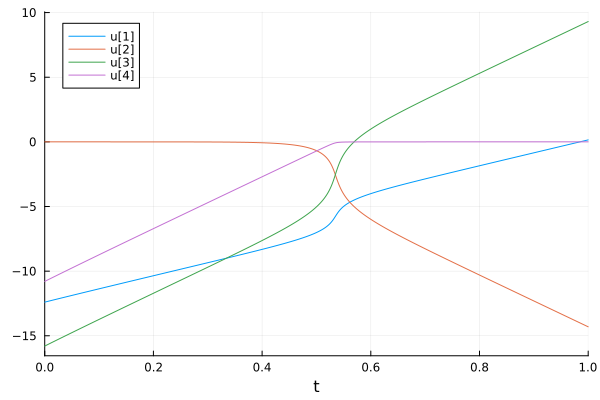

In [4]:
#--------------------------------------------example usage------------------------------------------------
sol = logx_traj_with_logqK_change(bnc_test, [-10., 0, -9, -5], [10., 0, -9, -5]; reltol=1e-8, abstol=1e-9)
Plots.plot(sol)
#case2--------

In [5]:

# Pr  SB NB CS CN
N2 = [1 1 0 -1 0 0
    2 1 1 0 -1 0
    1 0 1 0 0 -1]

bnc_test2 = bnc(N=N2)

logx_traj_with_logqK_change(bnc_test2, [], []; input_logspace=false, output_logspace=false)


#case3---------
# @btime let
N3 = N_generator(95, 100; min_binder=2, max_binder=5)
bnc_test3 = bnc(N=N3)

#find ss point
qK = vcat(randomize(bnc_test3.d, -6, 6), randomize(bnc_test3.r, -3, 3))
@btime qK2x(bnc_test3, qK)

qK_end = vcat(randomize(bnc_test3.d, -6, 6), randomize(bnc_test3.r, -3, 0))

@btime let
    bnc_test3 = bnc(N=N3)
    qK2x(bnc_test3, qK)
end
#3.862 3.863
#3.915

relerror = qK2x(bnc_test3, qK; output_logspace=true) |> (x -> x2qK(bnc_test3, x, input_logspace=true)) |> (x -> x ./ qK .- 1)
hist(relerror * 100, bins=100)
# original 1.411s; 14713 allocations; 

@btime sol = logx_traj_with_logqK_change(bnc_test3, log.(qK), log.(qK_end); reltol=1e-8, abstol=1e-9) #bdf solver
plot(sol)
# end

#case4---------

N4 = [0 -1 -1 1 0
    -1 0 0 -1 1]
bnc4 = bnc(N=N4)

x = randomize(bnc4.n * 100000, -6, 6; log_space=true) |> (x -> reshape(x, bnc4.n, 100000))
function rop_C(x)
    ∂logx_∂logqK(bnc4; x=x)[5, 1:3]
end
points = [rop_C(x[:, i]) for i in 1:size(x, 2)] |> (x -> reduce(hcat, x))
# plot the points
fig = Figure(size=(1920, 1080))
ax = Axis3(fig[1, 1],
    title="3D Scatter Plot of Reaction Order Points",
    xlabel="∂logCGRS/∂logtG",
    ylabel="∂logCGRS/∂logtR",
    zlabel="∂logCGRS/∂logtS",
    aspect=:data,
)
GLMakie.scatter!(ax,
    points[1, :], points[2, :], points[3, :];
    color=(:cyan, 0.5), markersize=6)


# case 5----------
N5 = [1 1 0 -1 0 0
    1 0 1 0 -1 0
    # 0 1 0 0 1 -1
    0 0 1 1 0 -1]
bnc5 = bnc(N=N5)


#fucntion test ------------
# qK2x_test(bnc_test,randomize(3,-6,6)) |> (x -> plot!(x, idxs=(1,2,3),legend = false))
model = bnc_test
test_x = [1.e-6, 2e3, 3e-2]
for i in 1:10000
    test_x = x2qK(model, test_x)
    test_x = qK2x(model, test_x)
end

# S_tot_grow
sol = logx_traj_with_logqK_change(bnc_test, [2, -10, 1.0e-9], [2, 10, 1.0e-9], reltol=1e-8, abstol=1e-9)
plot(sol)

logx0 = qK2x(bnc_test, [1.0e1, 1.0e2, 1.0e-1]; output_logspace=true)
time_curve_logx(bnc_test, logx0, (0.0, 150.); reltol=1e-8, abstol=1e-9) |> plot

LoadError: UndefVarError: `bnc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [1]:
Matrix(-I,4,4)

UndefVarError: UndefVarError: `I` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing LinearAlgebra in the current active module Main

In [11]:
using Symbolics
using Latexify

In [23]:
@variables x y

2-element Vector{Num}:
 x
 y

In [24]:
z = x^2 + y

y + x^2

In [25]:
A = [x^2 + y 0 2x
     0       0 2y
     y^2 + x 0 0]

3×3 Matrix{Num}:
 y + x^2  0  2x
       0  0  2y
 x + y^2  0   0

In [26]:
latexify(A) |> print

\begin{equation}
\left[
\begin{array}{ccc}
y + x^{2} & 0 & 2 x \\
0 & 0 & 2 y \\
x + y^{2} & 0 & 0 \\
\end{array}
\right]
\end{equation}


In [27]:
using SparseArrays
spA = sparse(A)
# latexify(A)

3×3 SparseMatrixCSC{Num, Int64} with 4 stored entries:
 y + x^2  ⋅  2x
       ⋅  ⋅  2y
 x + y^2  ⋅   ⋅

In [28]:
latexify(spA) |> print

\begin{equation}
\left[
\begin{array}{ccc}
y + x^{2} & 0 & 2 x \\
0 & 0 & 2 y \\
x + y^{2} & 0 & 0 \\
\end{array}
\right]
\end{equation}


In [29]:
function f(u)
  [u[1] - u[3], u[1]^2 - u[2], u[3] + u[2]]
end
f([x, y, z])

3-element Vector{Num}:
 x - y - (x^2)
      -y + x^2
      2y + x^2

In [24]:
@variables a, b,c

3-element Vector{Num}:
 a
 b
 c

In [36]:
simplify(a-b +b^2- b)

a - 2b + b^2

In [30]:
u = Symbolics.variables(:u, 1:5)
f(u)

3-element Vector{Num}:
    u₁ - u₃
 -u₂ + u₁^2
    u₂ + u₃

In [31]:
f([1,2,3,4])

3-element Vector{Int64}:
 -2
 -1
  5

In [32]:
f([1,2,2,3,3.])

3-element Vector{Float64}:
 -1.0
 -1.0
  4.0

In [86]:
@variables t
D = Differential(t)

Differential(t)

In [87]:
z = exp(t) + log(t)
D(z)

Differential(t)(exp(t) + log(t))

In [88]:
expand_derivatives(D(z))

1 / t + exp(t)

In [35]:
simplify(2x + 2y)

2(x + y)

In [36]:
B = simplify.([t + t^2 + t + t^2  2t + 4t
               x + y + y + 2t     x^2 - x^2 + y^2])

2×2 Matrix{Num}:
   2(t + t^2)   6t
 2(t + y) + x  y^2

In [37]:
simplify.(substitute.(B, (Dict(x => y^2),)))

2×2 Matrix{Num}:
     2(t + t^2)   6t
 2(t + y) + y^2  y^2

In [59]:
V = substitute.(B, (Dict(x => 2., y => 3, t => 4),))

2×2 Matrix{Num}:
     40  24
 14 + x   9

In [45]:
L = [1 0 2 1 2
    0 1 0 1 1]
x = Symbolics.variables(:x, 1:5)

5-element Vector{Num}:
 x₁
 x₂
 x₃
 x₄
 x₅

In [56]:
a = Symbolics.variables("a",1:1)

1-element Vector{Num}:
 a₁

In [62]:
Symbolics.value.(V)

2×2 Matrix{Any}:
 40        24
   14 + x   9

In [63]:
x,y,z = :x, :y, :z

(:x, :y, :z)

In [65]:
vars = @variables t $x $y(t) $z(t)[1:3]

4-element Vector{Any}:
    t
    x
 y(t)
     (z(t))[1:3]

In [70]:
@variables a b
Symbolics.toexpr(a + b^2)

:((+)(a, (^)(b, 2)))

In [71]:
ex = [:(v ~ w)
      :(w ~ -v)]

2-element Vector{Expr}:
 :(v ~ w)
 :(w ~ -v)

In [72]:
eqs = parse_expr_to_symbolic.(ex, (Main,))

2-element Vector{Equation}:
 v ~ w
 w ~ -v

In [76]:
eqs_lhs = [eq.lhs for eq in eqs]

2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 v
 w

In [ ]:
eqs_rhs = [eq.rhs for eq in eqs]

2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 w
 -v

In [74]:
Symbolics.jacobian(eqs_rhs, eqs_lhs)

2×2 Matrix{Num}:
  0  1
 -1  0

In [82]:
k = @variables t x(t) y(t) 

3-element Vector{Num}:
    t
 x(t)
 y(t)

In [90]:
z = x + y*t
D(z)

Differential(t)(x(t) + t*y(t))

In [91]:
expand_derivatives(D(z))

y(t) + Differential(t)(x(t)) + t*Differential(t)(y(t))

In [100]:
@variables g(..)

1-element Vector{Symbolics.CallWithMetadata{SymbolicUtils.FnType{Tuple, Real}, Base.ImmutableDict{DataType, Any}}}:
 g⋆

In [102]:
z = g(x,y) +g(x)+g(y)

g(y(t)) + g(x(t)) + g(x(t), y(t))

In [119]:
f(x, y) = x^2 + y
f(x, y) + y^2

y(t) + x(t)^2 + y(t)^2

In [120]:
h(x, y) = f(x, y)

@register_symbolic h(x, y)

In [121]:
h(x, y) + y^2

Main.h(x(t), y(t)) + y(t)^2

In [122]:
#Manually register its derivatives
# Derivative w.r.t. the first argument
Symbolics.derivative(::typeof(h), args::NTuple{2,Any}, ::Val{1}) = 2args[1]
# Derivative w.r.t. the second argument
Symbolics.derivative(::typeof(h), args::NTuple{2,Any}, ::Val{2}) = 1

In [123]:
Symbolics.derivative(h(x, y) + y^2, x)

2x(t)

In [124]:
Symbolics.derivative(h(x, y) + y^2, y)

1 + 2y(t)

In [128]:
using SymbolicUtils

In [141]:
@syms w::Real z 

(w, z)

In [149]:
@syms w::Real
Symbolics.simplify(log(exp(w)))

log(exp(w))

In [146]:
using Symbolics

# Define a symbolic variable
@variables w

# Define the expression
expr = exp(log(w))

# Define the simplification rule
r = @rule exp(log(~x)) => ~x

# Apply the simplification with the custom rule
simplified_expr = simplify(expr, rewriter=r)

println(simplified_expr)

w


In [21]:
using Graphs
function graph_generator(L)
    d, n = size(L)
    M1 = [zeros(Int, d, d)  L ; L' zeros(Int, n, n)]
    G = SimpleGraph(M1)
    return G
end

#----------

# Print the results
# println("Number of possible M matrices: ", length(matrices_M))
# for (idx, M) in enumerate(matrices_M)
#     println("\nM_$idx:")
#     println(M)
# end



using GLMakie, GraphMakie
using GraphMakie.NetworkLayout
# - ------

# L = [1 0 0 1 1 0 ; 0 1 0 1 0 1 ; 0 0 1 0 1 1]
# L = [1 0 1 1; 0 1 1 1]
# L = L_generator(10,20,min_binder=2,max_binder=2) 
L = L_generator(18,40)
# Example matrix
# valids = find_valid_regime(L)
let
d,n = size(L)
# M = idx_to_vertex(L, valids[16])
# G = graph_generator(M)
G = graph_generator(L)

p = graphplot(G; layout = Stress(;dim=3),
    node_size = 20 , node_color = vcat([:blue for i in 1:d],[:red for i in 1:n]), edge_color = :black,
    nlabels = vcat(["U"*string(i) for i in 1:d],["V"*string(i) for i in 1:n]),
    # edge_label = [string(i) for i in 1:ne(G)],
    # camera = (zoom=0.5, elevation=0.5, azimuth=0.5),
    # axis = (aspect=DataAspect(), title="Graph Plot")
)
display(p)
# M
end

GLMakie.Screen(...)

In [22]:
bnc_test._valid_L_idx

2-element Vector{Vector{Int64}}:
 [1, 3, 4]
 [2, 4]

In [23]:
bnc_test.L

2×4 Matrix{Int64}:
 1  0  2  2
 0  1  0  1